# Homework 6

## Calculating the error of the smearing resolution using three different methods

### Question 1: Using error propagation
### In the smearing exercise of Homework 5, for the smearing resolution we had 

$\sigma_{res}^2 = \sigma_{data}^2 - \sigma_{exp}^2 = \sigma_{data}^2 - \mu_{exp}^2 
= \sigma_{data}^2 - \mu_{data}^2,$ 

### because for the exponential there is the special relation $\sigma_{exp} =\mu_{exp}$ and because $\mu_{data} =  \mu_{exp} + \mu_{Gauss}$, where $\mu_{Gauss} = 0$ for the resolution function. 

### When trying to calculate the error of $\sigma_{res}$ using error propagation there are some difficulties. Though there is a well known formula for the error of the mean ($\sigma/\sqrt{n}$) one also needs the error of the standard deviation $\sigma$ but these are more tricky. The estimators for mean and standard deviation of the data might also be correlated. Anyway, we will get all this information in part b). 

### Therefore here just write down the formula for the error $\Delta\sigma_{res}$ (ideally also including the covariance term) for the case $\sigma_{res} = \sqrt{x^2 - y^2}$.

### Error Propagation for Smearing Resolution

The formula for error propagation is:

\$(\Delta z)^2 = \left( \frac{\partial f}{\partial x} \Delta x \right)^2 + \left( \frac{\partial f}{\partial y} \Delta y \right)^2 + 2 \cdot \text{Cov}(x, y) \cdot \frac{\partial f}{\partial x} \cdot \frac{\partial f}{\partial y}.
\$

---



Given:

\$
\sigma_{\text{res}} = \sqrt{x^2 - y^2},
\$

\$
\frac{\partial \sigma_{\text{res}}}{\partial x} = \frac{x}{\sqrt{x^2 - y^2}},
\$

\$
\frac{\partial \sigma_{\text{res}}}{\partial y} = \frac{-y}{\sqrt{x^2 - y^2}}.
\$

---

The error \$( (\Delta \sigma_{\text{res}})^2 \)$ becomes:

\$
(\Delta \sigma_{\text{res}})^2 = \left( \frac{x}{\sqrt{x^2 - y^2}} \Delta x \right)^2 + \left( \frac{-y}{\sqrt{x^2 - y^2}} \Delta y \right)^2 + 2 \cdot \text{Cov}(x, y) \cdot \frac{x}{\sqrt{x^2 - y^2}} \cdot \frac{-y}{\sqrt{x^2 - y^2}}.
\$

Then

\$
(\Delta \sigma_{\text{res}})^2 = \frac{x^2 (\Delta x)^2}{x^2 - y^2} + \frac{y^2 (\Delta y)^2}{x^2 - y^2} - \frac{2xy \cdot \text{Cov}(x, y)}{x^2 - y^2}.
\$

Then

\$
\Delta \sigma_{\text{res}} = \sqrt{\frac{x^2 (\Delta x)^2 + y^2 (\Delta y)^2 - 2xy \cdot \text{Cov}(x, y)}{x^2 - y^2}}.
\$

---

### Explanation of Terms

- $(x = \sigma_{\text{data}})$ : The standard deviation of the data.
- $(y = \mu_{\text{data}})$ : The mean of the data.
- $(\Delta x = \Delta \sigma_{\text{data}})$: Error in \(x\).
- $(\Delta y = \Delta \mu_{\text{data}})$: Error in \(y\).
- $(\text{Cov}(x, y))$: Covariance between $(x)$ and $(y)$.

---



In [1]:
import numpy as np

def calculate_error_sigma_res(x, y, delta_x, delta_y, covariance):
    
    # The x should be grater than y 
    if x**2 <= y**2:
        raise ValueError("x^2 must be greater than y^2 for a valid σ_res.")
    
    term_x = (x * delta_x) ** 2
    term_y = (y * delta_y) ** 2
    covariance_term = -2 * x * y * covariance

    denominator = x**2 - y**2

    delta_sigma_res_squared = (term_x + term_y + covariance_term) / denominator

    return np.sqrt(delta_sigma_res_squared)

### Question 2a: Using a Monte Carlo simulation 
### Do 1000 experiments where for each experiment you smear 40,000 exponential random numbers (mean lifetime $\tau_{true} = 2.2$ ps) with a Gaussian random number ($\sigma_{true} = 0.88$ ps). [You can forget about the time unit.] For each experiment calculate the mean value and the standard deviation (like you did in the smearing exercise) and then the resolution by using the above formula. 

### With the 1000 values obtained, plot histograms for the mean value (1), the standard deviation (2) and the resolution (3). 

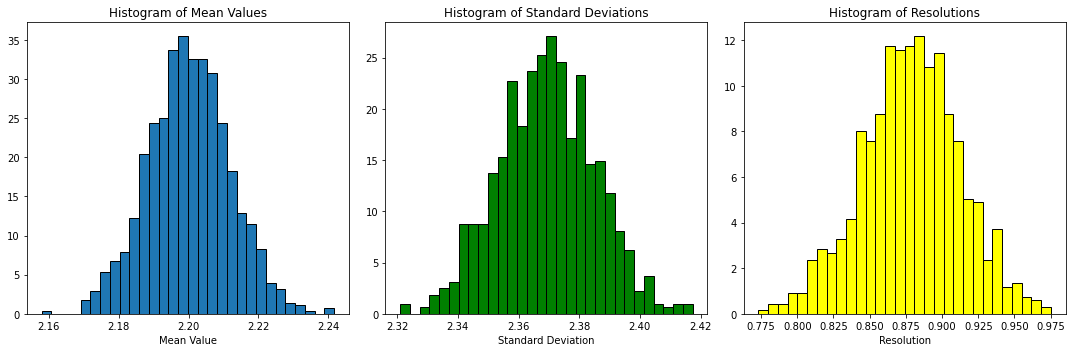

In [2]:
import matplotlib.pyplot as plt

num_experiments = 1000  
num_samples = 40000  
tau_true = 2.2 
sigma_true = 0.88 

means = []
std_devs = []
resolutions = []


for _ in range(num_experiments):
    exp_samples = np.random.exponential(scale=tau_true, size=num_samples)
    gauss_samples = np.random.normal(loc=0, scale=sigma_true, size=num_samples)
    smeared_samples = exp_samples + gauss_samples
    mean_value = np.mean(smeared_samples)
    std_dev = np.std(smeared_samples)
    resolution = np.sqrt(std_dev**2 - mean_value**2)
    means.append(mean_value)
    std_devs.append(std_dev)
    resolutions.append(resolution)

    
    
    
plt.figure(figsize=(15, 5))
# Mean values hist 
plt.subplot(1, 3, 1)
plt.hist(means, bins=30,label='Mean Values', edgecolor= "black", density = True)
plt.xlabel('Mean Value')
plt.title('Histogram of Mean Values')

# Standard deviations hist 
plt.subplot(1, 3, 2)
plt.hist(std_devs, bins=30, color='green' , label='Standard Deviations', edgecolor= "black", density = True)
plt.xlabel('Standard Deviation')
plt.title('Histogram of Standard Deviations')

# The resolutions hist
plt.subplot(1, 3, 3)
plt.hist(resolutions, bins=30, color='yellow', label='Resolutions', edgecolor= "black", density = True)
plt.xlabel('Resolution')
plt.title('Histogram of Resolutions')

plt.tight_layout()
plt.show()


### Question 2b: 

### Their errors are given by the standard deviations of the Gaussian like histograms. Quote these errors in a nice table. 


In [3]:
import pandas as pd

mean_error = np.std(means)
std_dev_error = np.std(std_devs)
resolution_error = np.std(resolutions)

data = {
    "Parameter": ["Mean Value", "Standard Deviation", "Resolution"],
    "Error (Standard Deviation)": [mean_error, std_dev_error, resolution_error],
}
error_table = pd.DataFrame(data)
error_table


,Parameter,Error (Standard Deviation)
0,Mean Value,0.011706
1,Standard Deviation,0.015841
2,Resolution,0.033676


### Question 2c: 

### Check that the error of the mean value obtained here agrees with the one calculated with the general formula $\sigma_{data}^{true}/\sqrt{n}$, where $\sigma_{data}^2 = \sigma_{exp}^2 + \sigma_{res}^2 $. Remember: variance of (independent) sum is sum of variances!


In [4]:
variance_exp = tau_true**2  
variance_res = sigma_true**2  
variance_data = variance_exp + variance_res  

# Standard deviation of the smeared data
sigma_data = np.sqrt(variance_data)

# Theoretical error of the mean value
theoretical_mean_error = sigma_data / np.sqrt(num_samples)

mean_error_difference = abs(theoretical_mean_error - mean_error)

print (f"Theory is : {theoretical_mean_error}")
print (f"The mean error is : {mean_error}")

Theory is : 0.01184736257569591
The mean error is : 0.011706465455362103


### Question 2d: 

### Also draw a 2D scatter plot between the two variables 1 and 2, in order to check whether they are correlated or not.


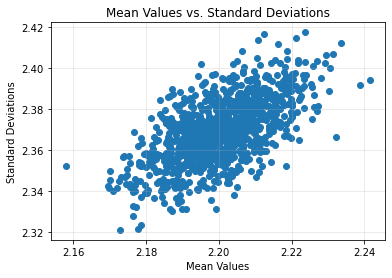

In [5]:
# 2D scatter plot between mean values (1) and standard deviations (2)
plt.scatter(means, std_devs)
plt.xlabel('Mean Values')
plt.ylabel('Standard Deviations')
plt.title('Mean Values vs. Standard Deviations')
plt.grid(alpha=0.3)
plt.show()


#### **I think they are correlated linear** 

### Question 3: Using a fit (e.g. $\chi^2$-fit):
### Fit the PDF $f(x)$ for the convolution of an exponential (mean $\tau$) with a Gaussian (standard deviation $\sigma$ = resolution) to the data of the smearing exercise of Homework 5. Probably you have to include an amplitude factor. The fit result should display the errors of the parameters. $f(x) = (f_{exp} * f_G) (x)= \frac{1}{2\tau} \exp \left(\frac{\sigma^2}{2\tau^2} - \frac{x}{\tau} \right) \left[ \mathrm{erf} \left(\frac{x}{\sqrt{2}\sigma} - \frac{\sigma}{\sqrt{2}\tau} \right) + 1\right],$ where $\mathrm{erf}(y)$ is the error function, which should be available in your fitting software.

Fitted Parameters:
Tau: 2.256689660249967 ± 0.06955931983218491
Sigma: 0.8426557939711702 ± 0.045677118151530145


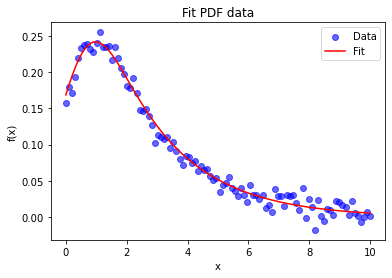

In [6]:
from scipy.special import erf
import numpy as np
from scipy.optimize import curve_fit

def convolution_pdf(x, tau, sigma):
    prefactor = 1 / (2 * tau)
    exponential_part = np.exp((sigma**2) / (2 * tau**2) - x / tau)
    erf_part = erf(x / (np.sqrt(2) * sigma) - sigma / (np.sqrt(2) * tau)) + 1
    return prefactor * exponential_part * erf_part


x_data = np.linspace(0, 10, 100) 
y_data = convolution_pdf(x_data, 2.2, 0.88) + np.random.normal(0, 0.01, size=len(x_data))  # Add noise for testing

# guesses
initial_guess = [2.2, 0.88]  # tau, sigma, amplitude

# Perform the fit
params, covariance = curve_fit(convolution_pdf, x_data, y_data, p0=initial_guess)

# Extract fitted parameters and their errors
tau_fit, sigma_fit = params
tau_error, sigma_error = np.sqrt(np.diag(covariance))

# Results
print("Fitted Parameters:")
print(f"Tau: {tau_fit} ± {tau_error}")
print(f"Sigma: {sigma_fit} ± {sigma_error}")


plt.scatter(x_data, y_data, label='Data', alpha=0.6, color='blue')
plt.plot(x_data, convolution_pdf(x_data, *params), label='Fit', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fit PDF data')
plt.legend()
plt.show()


## Gaussian random numbers Students' t-distribution

### Question 1: Take two independent uniformly distributed random numbers $R_1$ and $R_2$ (interval [0,1]) and use them to calculate two standard normal (Gaussian) random numbers $X_1$ and $X_2$ by implementing the algorithm in lecture 6 page 77.

In [7]:
R1, R2 = np.random.uniform(0, 1, 2)
X1 = np.sqrt(-2 * np.log(R1)) * np.cos(2 * np.pi * R2)
X2 = np.sqrt(-2 * np.log(R1)) * np.sin(2 * np.pi * R2)
print(f" X1 = {X1}, X2 = {X2}")


 X1 = 0.2707127634497554, X2 = 0.6568948737940068


### Question 2: Do the above 10,000 times and draw a 2D scatter plot. For independent random variables the plot should look radially symmetric.

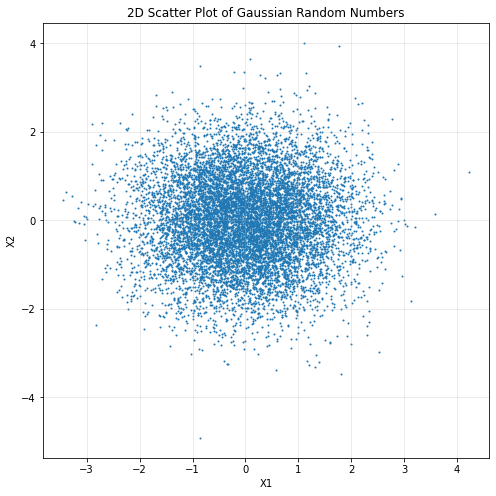

In [8]:
R1, R2 = np.random.uniform(0, 1, 10000), np.random.uniform(0, 1, 10000)
X1 = np.sqrt(-2 * np.log(R1)) * np.cos(2 * np.pi * R2)
X2 = np.sqrt(-2 * np.log(R1)) * np.sin(2 * np.pi * R2)

# Plot the 2D scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(X1, X2, s=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Scatter Plot of Gaussian Random Numbers')
plt.grid(alpha=0.3)
plt.show()



### Question 3: For each pair of numbers in Question 2 above, calculate the estimated mean $\hat{\mu}$ and the estimated variance $\hat{var} \equiv  S^2 = \frac{1}{2 - 1}\sum_{i=1}^{2} (X_i - \hat{\mu} )^2.$ and plot their histograms.

### Overlay properly scaled theoretical PDFs to the histograms (a Gaussian and the chi-square distribution with 1 degree of freedom). If you like, you can also fit the functions.

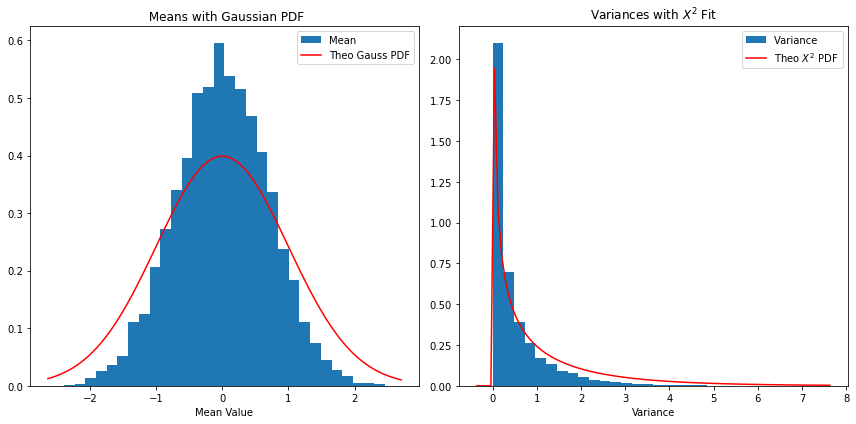

In [72]:
from scipy.stats import norm, chi2

means = (X1 + X2) / 2
variances = ((X1 - means) ** 2 + (X2 - means) ** 2) / 2


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mean Histogram and Gaussian fit
axes[0].hist(means, bins=30, density=True, label='Mean ')
xmin, xmax = axes[0].get_xlim()
x_vals = np.linspace(xmin, xmax, 100)
y_vals = norm.pdf(x_vals, loc=0, scale=1)  # Standard normal PDF
axes[0].plot(x_vals, y_vals, 'r-', label='Theo Gauss PDF')
axes[0].set_title(' Means with Gaussian PDF')
axes[0].set_xlabel('Mean Value')
axes[0].legend()

# Variance Histogram and Chi-Square fit
axes[1].hist(variances, bins=30, density=True,label='Variance ')
xmin, xmax = axes[1].get_xlim()
x_vals = np.linspace(xmin, xmax, 100)
y_vals = chi2.pdf(x_vals, df=1)  # Chi-square PDF with 1 degree of freedom
axes[1].plot(x_vals, y_vals, 'r-', label=f'Theo $X^2$ PDF')
axes[1].set_title(f'Variances with $X^2$ Fit')
axes[1].set_xlabel('Variance')
axes[1].legend()

plt.tight_layout()
plt.show()


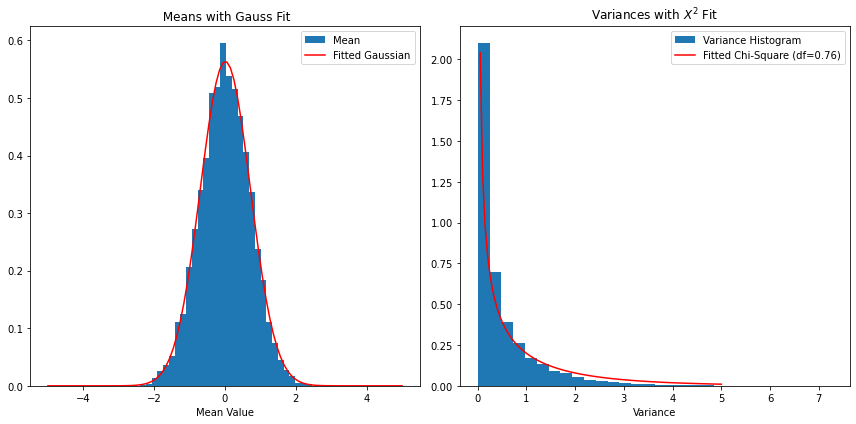

In [76]:
from scipy.optimize import curve_fit


def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def chi_square(x, df):
    return chi2.pdf(x, df)

# Plot histograms for means and variances
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mean Histogram and Gaussian fit
n_means, bins_means, _ = axes[0].hist(means, bins=30, density=True, label='Mean')

# Calculate bin centers for the fitting
bin_centers_means = 0.5 * (bins_means[1:] + bins_means[:-1])

# Fit the Gaussian to the means histogram
params_mean, _ = curve_fit(gaussian, bin_centers_means, n_means, p0=[0, 1])
mu_fit, sigma_fit = params_mean

# Plot fitted Gaussian
x_vals = np.linspace(-5, 5, 100)
x_vals2 = np.linspace(0, 5, 100)
y_vals = gaussian(x_vals, mu_fit, sigma_fit)
axes[0].plot(x_vals, y_vals, 'r-', label=f'Fitted Gaussian')

axes[0].set_title(' Means with Gauss Fit')
axes[0].set_xlabel('Mean Value')
axes[0].legend()

# Variance his and chi-square fit
n_vars, bins_vars, _ = axes[1].hist(variances, bins=30, density=True, label='Variance Histogram')

# Calculate bin centers for the fitting
bin_centers_vars = 0.5 * (bins_vars[1:] + bins_vars[:-1])

# Fit the Chi-square to the variances histogram
params_var, _ = curve_fit(chi_square, bin_centers_vars, n_vars, p0=[1])
df_fit = params_var[0]


y_vals = chi_square(x_vals2, df_fit)
axes[1].plot(x_vals2, y_vals, 'r-', label=f'Fitted Chi-Square (df={df_fit:.2f})')
axes[1].set_title(f'Variances with $X^2$ Fit')
axes[1].set_xlabel('Variance')
axes[1].legend()

plt.tight_layout()
plt.show()


### Question 4: Finally define the random variable $T_1 := \frac{X_1 + X_2}{|X_1 - X_2|} ~~~ (\propto \hat{\mu}/S)$ and again plot a histogram. 
### Find the constant of proportionality in the above relation. This random variable $T_1$ is distributed according to the Student's t-distribution with 1 degree of freedom.
### Look up this function and overlay it to the histogram. Remark: By chance the PDF for $T_1$ is identical to another well known distribution.

In [12]:
R1, R2 = np.random.uniform(0, 1, 10000), np.random.uniform(0, 1, 10000)
X1 = np.sqrt(-2 * np.log(R1)) * np.cos(2 * np.pi * R2)
X2 = np.sqrt(-2 * np.log(R1)) * np.sin(2 * np.pi * R2)

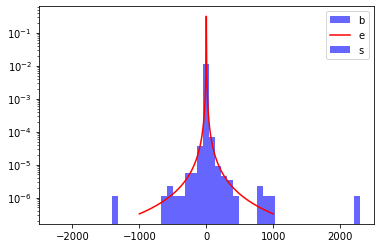

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, cauchy

T1 = (X1 + X2) / np.abs(X1 - X2)

# for special case when v=1, t-distrib tend to cauchy distrib so:

x = np.linspace(-1000, 1000, 10000) 
cauchy_pdf = cauchy.pdf(x) 


_= plt.hist(T1, bins=50, density=True, alpha=0.6, color='blue', label='Histogram of T1')
 
plt.plot(x, cauchy_pdf, 'r-', label="Cauchy PDF")


plt.hist
plt.yscale("log")
plt.xlim(-2500,2500)

### as you can the cauchy distribution has a nice fitting to t-distribution in 1 degree roughly. 